# Section 7

In [129]:
import numpy as np
import pandas as pd

In [130]:
df = pd.read_csv('Data/macrodata.csv', index_col=0, parse_dates=True)

In [131]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

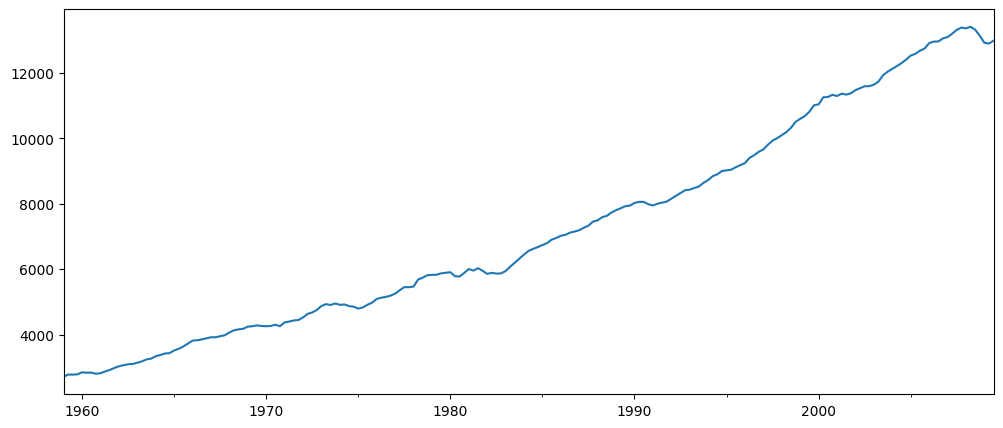

In [132]:
df['realgdp'].plot(figsize=(12,5))

In [133]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [134]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [135]:
type(gdp_trend)

pandas.core.series.Series

In [136]:
df['trend'] = gdp_trend

In [137]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<Axes: >

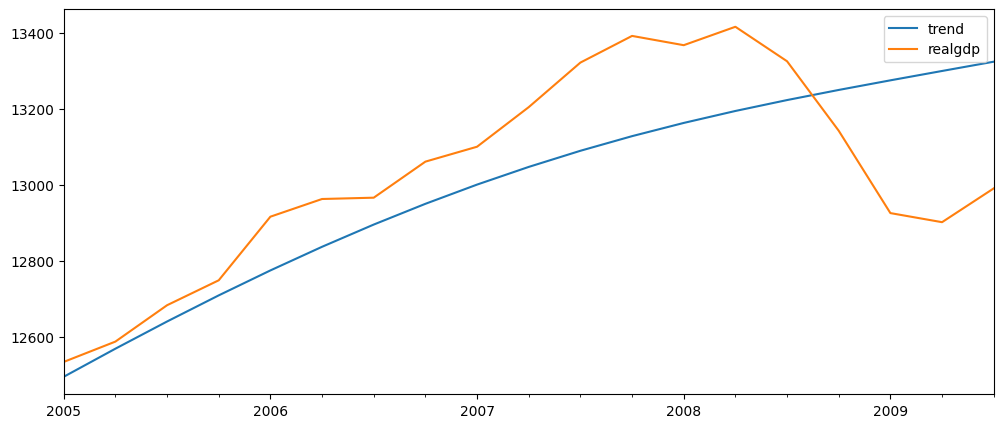

In [138]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12,5))

# ETS 분해

In [139]:
import pandas as pd
import numpy as np

In [140]:
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [141]:
airline = airline.dropna()

In [142]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

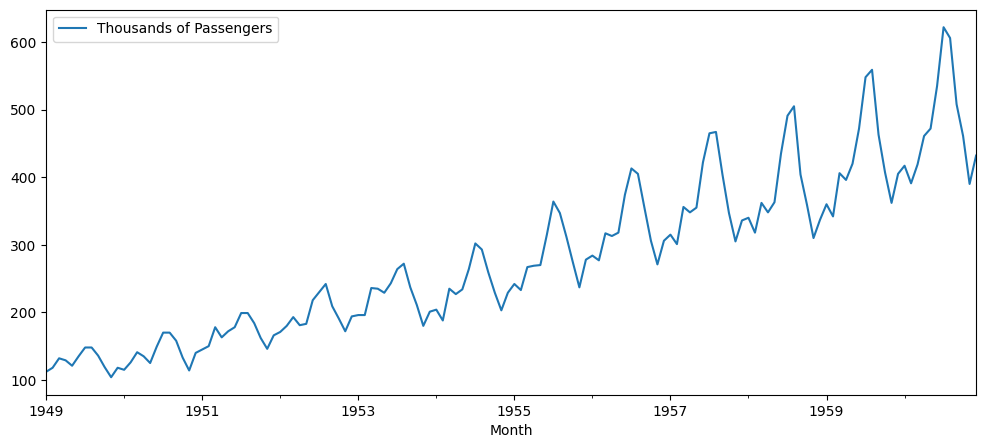

In [143]:
airline.plot()

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [145]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

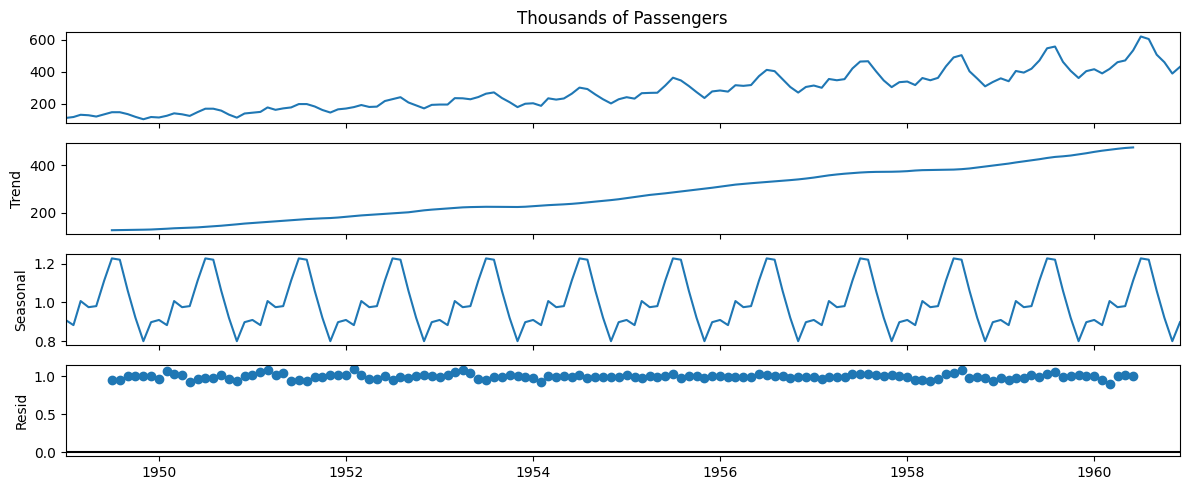

In [146]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();

# EWMA - 지수 가중 이동 평균

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month')

In [152]:
airline.dropna(inplace=True)

In [154]:
airline.index = pd.to_datetime(airline.index)

In [157]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [160]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [162]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

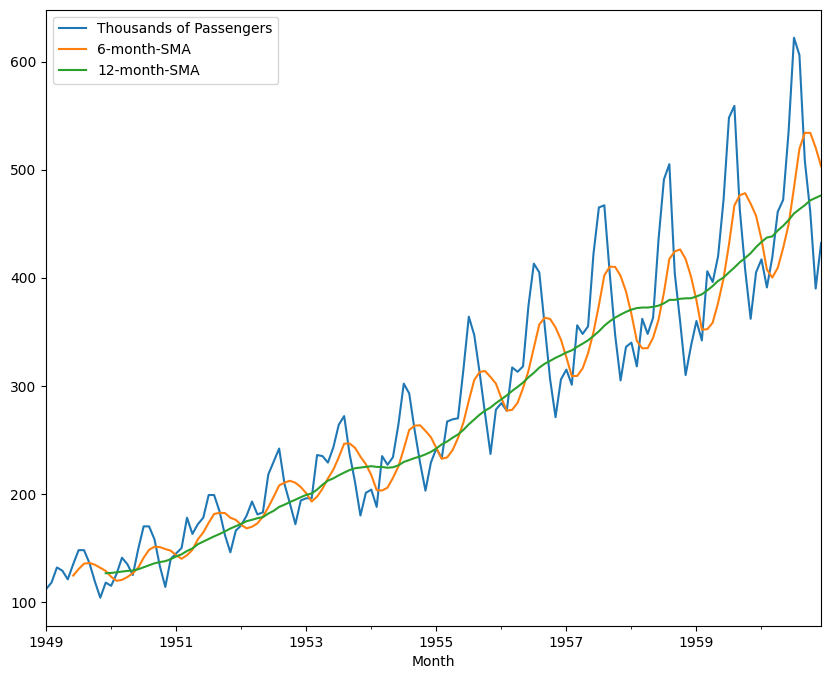

In [165]:
airline.plot(figsize=(10,8))

In [167]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<Axes: xlabel='Month'>

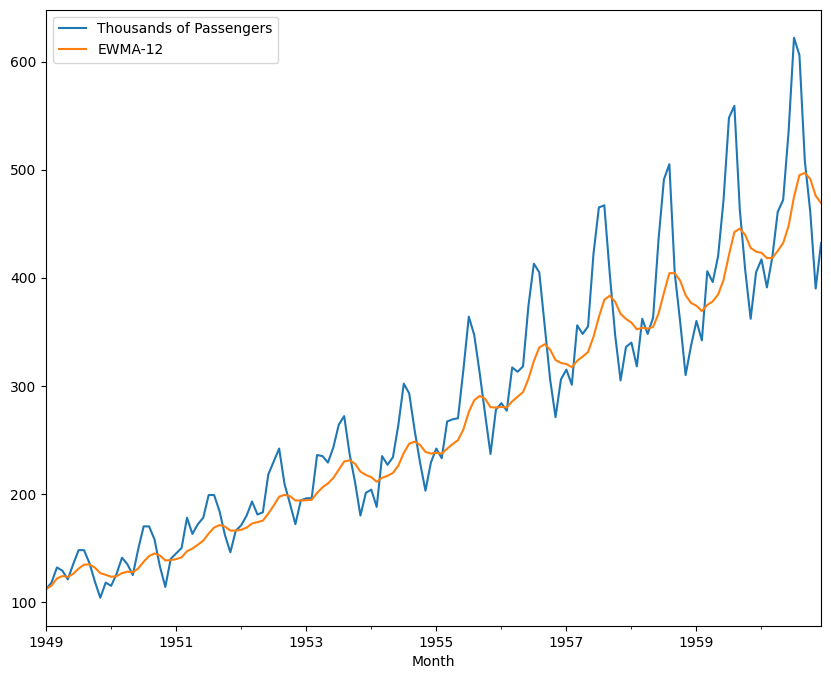

In [169]:
airline[['Thousands of Passengers', "EWMA-12"]].plot(figsize=(10,8))

# 홀트-윈터스 계절성 기법을 이용한 코드 짜보기 - Part 1

In [170]:
import pandas as pd
import numpy as np

In [172]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [174]:
df = df.dropna()

In [177]:
df.index.freq = 'MS'

In [179]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [182]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [183]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [184]:
span = 12
alpha = 2 / (span + 1)

In [186]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [188]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [190]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [193]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [197]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [198]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


# 홀트-윈터스 계절성 기법을 이용한 코드 짜보기 - Part 2

In [200]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: xlabel='Month'>

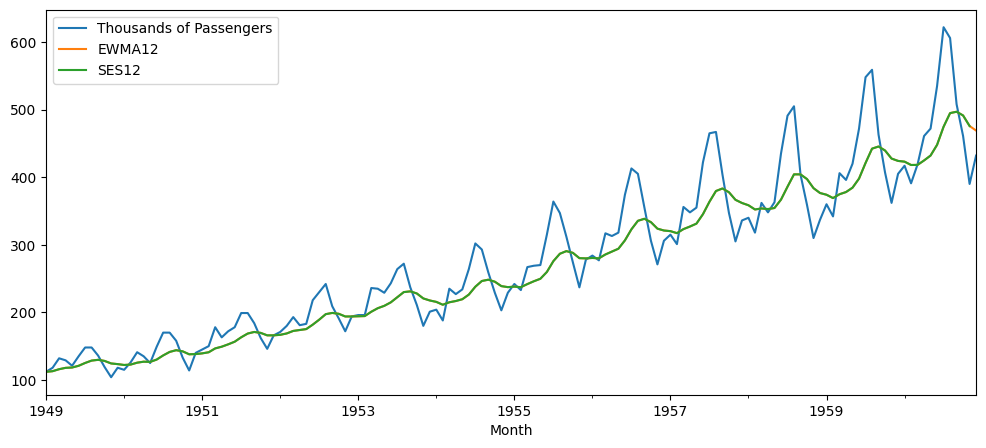

In [201]:
df.plot()

In [216]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

In [217]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,113.479115,113.990701
1949-02-01,118,112.923077,112.923077,119.471753,120.031669
1949-03-01,132,115.857988,115.857988,133.450947,134.235979
1949-04-01,129,117.879836,117.879836,130.496253,131.270786
1949-05-01,121,118.359861,118.359861,122.509277,123.156267


In [220]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12'],
      dtype='object')

<Axes: xlabel='Month'>

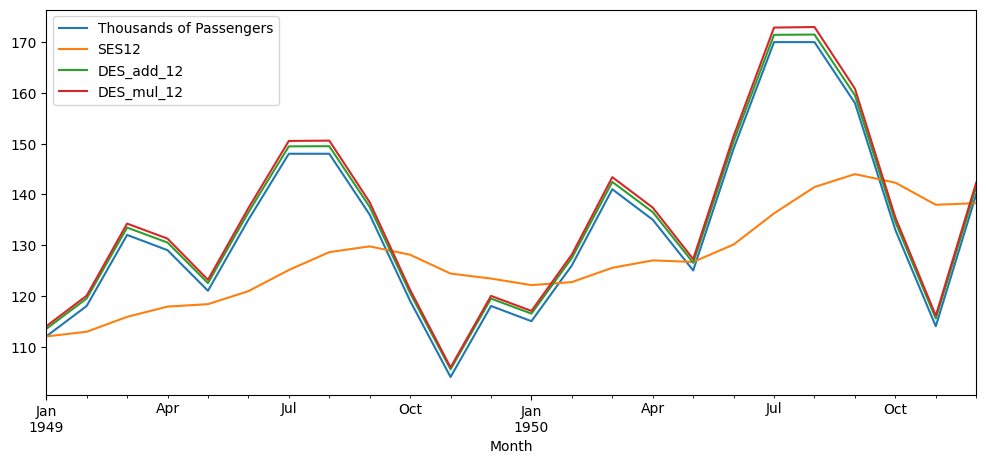

In [224]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,5))

In [227]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [230]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

<Axes: xlabel='Month'>

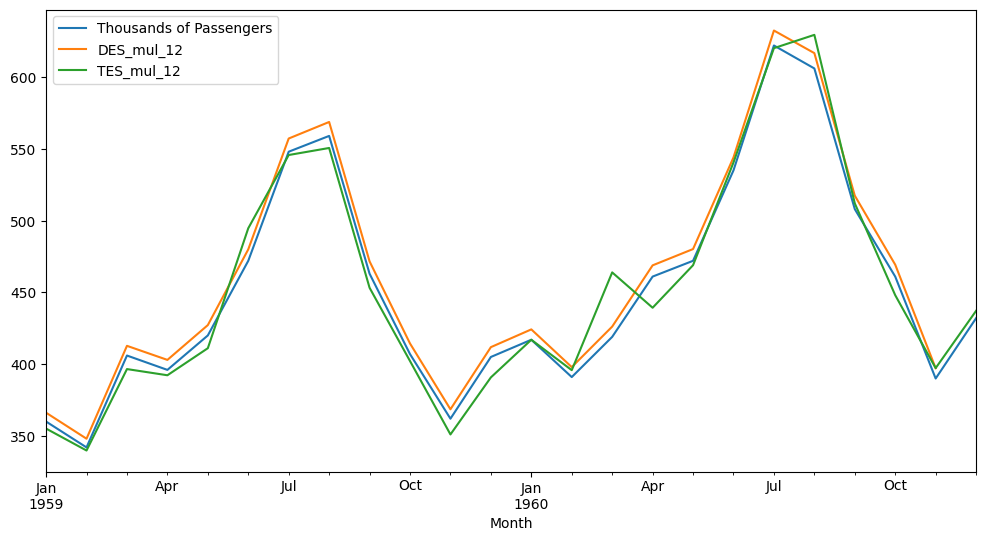

In [235]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,6))